<font size=7> Latencies Analysis

In [67]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, latencies
from human_hip.animate import animate_latencies
import human_hip.spike_data as spike_data

In [68]:
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle
from ipywidgets import interact_manual, interact

In [69]:
with open("/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl", "rb") as filename:
    sd = pickle.load(filename)

In [51]:
sttc_delta=20
sttc_cutoff = 0.0

print(sd.N**2 , "Starting Pairs")
sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
for i in range(sd.N):
    for j in range(i+1,sd.N):
        if sttc_neo[i,j] > sttc_cutoff:
            pairs.append([i,j])
print( len(pairs), "pairs above sttc cutoff")

all_pair_latencies = []
#pairs_late = [] #lags_late = []
count = 0
for pair in pairs:
    count += 1
    if count % 1000 == 0:
        print(count)
    pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=200)  #latency= np.median(pair_latencies)
    #if abs(np.median(pair_latencies))> latency_cutoff:
    #    pairs_late.append( pair )  #lags_late.append( latency )
    all_pair_latencies.append( pair_latencies )

18496 Starting Pairs
5960 pairs above sttc cutoff
1000
2000
3000
4000
5000


In [52]:
#curated_latencies = []
curated_pairs = []
len_all_pair_latencies = []
for i in range(len(all_pair_latencies)):
    len_all_pair_latencies.append(len(all_pair_latencies[i]))
#curated_pairs.append( pairs[i] )

(array([541., 639., 525., 452., 429., 416., 308., 275., 255., 220., 212.,
        180., 165., 111., 115.,  76.,  95.,  75.,  65.,  56.,  61.,  62.,
         45.,  43.,  35.,  42.,  44.,  42.,  20.,  15.,  13.,  24.,  32.,
         16.,  22.,  11.,  19.,  15.,  15.,  12.,  12.,   9.,  11.,   2.,
          8.,   4.,   4.,   5.,   5.,   7.,   7.,   4.,   6.,   5.,   5.,
          6.,   9.,   6.,   7.,   1.,   2.,   2.,   1.,   0.,   1.,   3.,
          0.,   0.,   1.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   2.,
          1.,   0.,   0.,   3.,   0.,   1.,   1.,   0.,   2.,   0.,   1.,
          1.,   2.,   3.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   2.,
          1.]),
 array([2.000e+00, 3.900e+01, 7.600e+01, 1.130e+02, 1.500e+02, 1.870e+02,
        2.240e+02, 2.610e+02, 2.980e+02, 3.350e+02, 3.720e+02, 4.090e+02,
        4.460e+02, 4.830e+02, 5.200e+02, 5.570e+02, 5.940e+02, 6.310e+02,
        6.680e+02, 7.050e+02, 7.420e+02, 7.790e+02, 8.160e+02, 8.530e+02,
        8.900e+02, 9.2

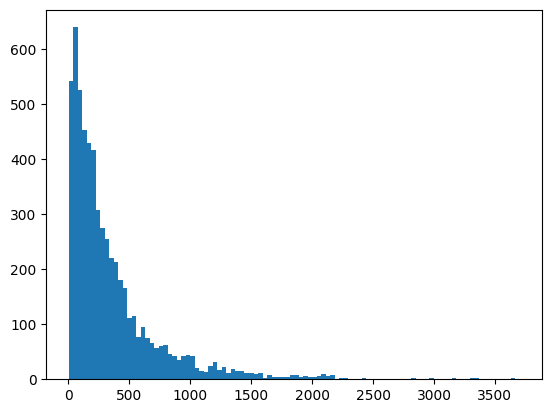

In [53]:
plt.hist(len_all_pair_latencies, bins=100)

In [59]:
curated_latencies = []
curated_pairs = []
for i in range(len(all_pair_latencies)):
    pair_latencies = all_pair_latencies[i]
    if abs(np.mean(pair_latencies))> 20 and len(pair_latencies)>200: #abs(np.median(pair_latencies))> 1.5 and 
        if np.mean(pair_latencies) < 0:
            curated_pairs.append( pairs[i] )  #lags_late.append( latency )
            curated_latencies.append( pair_latencies )
        else:
            curated_pairs.append( [ pairs[i][1], pairs[i][0] ] ) 
            curated_latencies.append( pair_latencies )
#curated_pairs.append( pairs[i] )
print(len(curated_latencies))
curated_pairs = np.array(curated_pairs)

13


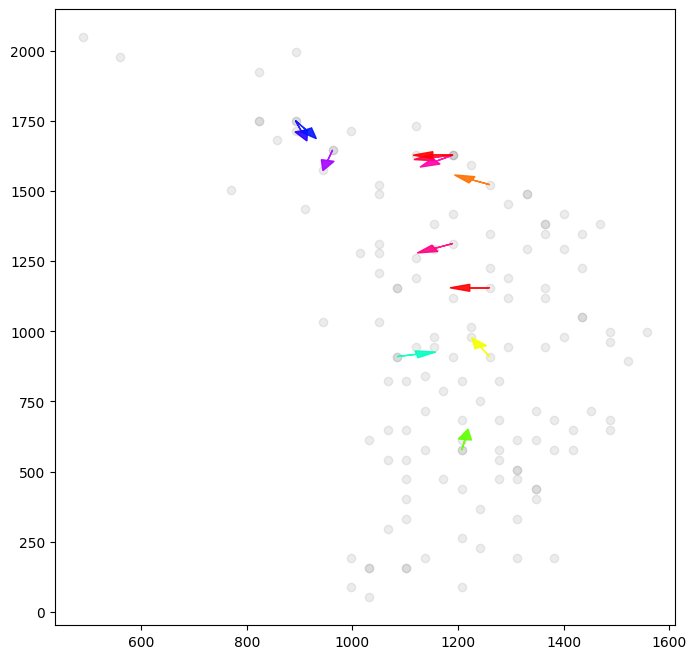

In [72]:
plot_vector_layout( sd, curated_pairs  )

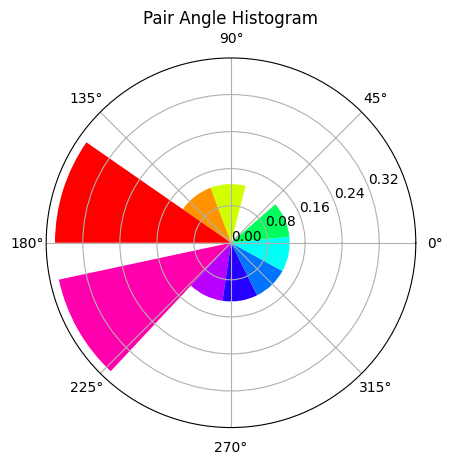

In [73]:
plot_latency_angle_hist( sd, curated_pairs, by_firing_rate=False)

In [70]:
def pairs_hisogram(pairs, sd, ms_cutoff_high=15):
    @interact
    def plot_pair(pair = (0, len(pairs)-1) ):
        latencies_pair = latencies( pairs[pair,0], pairs[pair,1], sd, ms_cutoff_high=200  )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)

In [71]:
pairs_hisogram( curated_pairs, sd, ms_cutoff_high=200)

interactive(children=(IntSlider(value=6, description='pair', max=12), Output()), _dom_classes=('widget-interac…